In [86]:
import pandas as pd

# load all_fouls_advanced.pkl (dataframe) and and all_the_features.pkl (list)
all_fouls_advanced_with_vaep = pd.read_pickle('all_fouls_advanced_with_vaep.pkl')
all_fouls_advanced_with_vaep.set_index('id', inplace=True)
all_the_features = pd.read_pickle('all_the_features.pkl')

In [87]:
# the last column in all_the_features and the 'id' column in all_fouls_advanced are the same. based on this, add a new element to each all_the_features that takes the 'vaep_offensive' column from all_fouls_advanced when the 'id' column matches. Remember all_the_features is just a list of lists. Also 'id' is all_fouls_advanced's index.
for i in range(len(all_the_features)):
    all_the_features[i].append(all_fouls_advanced_with_vaep.loc[all_the_features[i][-1], 'vaep_value_offensive'])

print (all_the_features[0])

[3, 0, 54.17600945067844, 0.2843847765938589, 1, 1, 'f1dd3418-5813-4df3-b319-97e1f821a4bb', 0.00022205110872164369]


In [88]:
len(all_the_features)

19865

In [89]:
# Save all_the_features as a pickle file in file path: all_the_features_with_vaep.pkl
import pickle
with open('all_the_features_with_vaep.pkl', 'wb') as f:
    pickle.dump(all_the_features, f)

In [90]:
import pandas as pd

# load all_fouls_advanced.pkl
all_fouls_advanced_with_vaep = pd.read_pickle('all_fouls_advanced_with_vaep.pkl')

# load model_lgbm_regressor.pkl
# model_lgbm_regressor = pd.read_pickle('model_lgbm_regressor.pkl')

# load model_lgbm_classifier.pkl
# model_lgbm_classifier = pd.read_pickle('model_lgbm_classifier.pkl')

# load all_the_features.pkl
all_the_features_with_vaep = pd.read_pickle('all_the_features_with_vaep.pkl')

# load all_the_labels.pkl
all_the_labels = pd.read_pickle('all_the_labels.pkl')


In [91]:
all_the_features[0]

[3,
 0,
 54.17600945067844,
 0.2843847765938589,
 1,
 1,
 'f1dd3418-5813-4df3-b319-97e1f821a4bb',
 0.00022205110872164369]

In [92]:
# convert all_the_features which is a list to a dataframe. The name of columns are: ['minutes', 'score_difference', 'distance_to_goal', 'angle_to_goal', 'foul_count_player', 'foul_count_team', 'vaep_offensive', 'id']
all_the_features_with_vaep = pd.DataFrame(all_the_features, columns=['minutes', 'score_difference', 'distance_to_goal', 'angle_to_goal', 'foul_count_player', 'foul_count_team', 'id', 'vaep_offensive'])

# set id as index
all_the_features_with_vaep.set_index('id', inplace=True)

In [93]:
len(all_the_features_with_vaep)

19865

In [94]:
# Save all_the_features_with_vaep as a pickle file in file path: all_the_features_with_vaep_df.pkl
import pickle
with open('all_the_features_with_vaep_df.pkl', 'wb') as f:
    pickle.dump(all_the_features_with_vaep, f)

In [95]:
# Add column 'label' to all_the_features_with_vaep. The values of this column should be filled from all_the_labels which is a list of list, with each list element with one value only.
all_the_features_with_vaep['label'] = all_the_labels

# each label in all_the_features_with_vaep is a list with one element. convert it to a single value
all_the_features_with_vaep['label'] = all_the_features_with_vaep['label'].apply(lambda x: x[0])

all_the_features_with_vaep.head()

,minutes,score_difference,distance_to_goal,angle_to_goal,foul_count_player,foul_count_team,vaep_offensive,label
id,,,,,,,,
f1dd3418-5813-4df3-b319-97e1f821a4bb,3,0,54.176009,0.284385,1,1,0.000222,2
b9948ea0-9079-4d01-bdc7-8022567fe66a,34,-2,62.502000,-0.651501,1,2,0.001036,2
c1ee4d2c-2ef8-4128-b93a-ee8e666e663b,58,2,60.462881,0.319659,1,1,-0.000487,0
183de912-efda-4e99-9033-7c9ed5d4ed9c,63,-2,68.368706,-0.324526,1,3,0.000877,2
66e76aec-d130-4d3a-aea8-960f1bcb37b4,65,-2,66.455399,0.579656,2,4,0.000773,2


In [96]:
all_the_features_with_vaep['label'].value_counts()

2    10630
0     9034
1      201
Name: label, dtype: int64

In [97]:
# 2: neither yellow nor red card nor second yellow card
# 1: red card
# 0: yellow card or second yellow card

In [98]:
# remove all rows with label = 1
all_the_features_with_vaep = all_the_features_with_vaep[all_the_features_with_vaep['label'] != 1]

# convert all labels with value 0 to 1
all_the_features_with_vaep['label'] = all_the_features_with_vaep['label'].apply(lambda x: 1 if x == 0 else x)

# convert all labels with value 2 to 0
all_the_features_with_vaep['label'] = all_the_features_with_vaep['label'].apply(lambda x: 0 if x == 2 else x)



In [99]:
all_the_features_with_vaep['label'].value_counts()

0    10630
1     9034
Name: label, dtype: int64

In [100]:

with open('features_with_label_df.pkl', 'wb') as f:
    pickle.dump(all_the_features_with_vaep, f)

In [101]:
import pickle
import pandas as pd

# load features_with_label_df.pkl
features_with_label_df = pd.read_pickle('features_with_label_df.pkl')

features_with_label_df.head()

,minutes,score_difference,distance_to_goal,angle_to_goal,foul_count_player,foul_count_team,vaep_offensive,label
id,,,,,,,,
f1dd3418-5813-4df3-b319-97e1f821a4bb,3,0,54.176009,0.284385,1,1,0.000222,0
b9948ea0-9079-4d01-bdc7-8022567fe66a,34,-2,62.502000,-0.651501,1,2,0.001036,0
c1ee4d2c-2ef8-4128-b93a-ee8e666e663b,58,2,60.462881,0.319659,1,1,-0.000487,1
183de912-efda-4e99-9033-7c9ed5d4ed9c,63,-2,68.368706,-0.324526,1,3,0.000877,0
66e76aec-d130-4d3a-aea8-960f1bcb37b4,65,-2,66.455399,0.579656,2,4,0.000773,0


In [102]:
# print value_counts but map it to 1 is yellow card, 0 is no card in label column
features_with_label_df['label'].value_counts()

0    10630
1     9034
Name: label, dtype: int64

In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report


In [105]:
features_with_label_df.head()

,minutes,score_difference,distance_to_goal,angle_to_goal,foul_count_player,foul_count_team,vaep_offensive,label
id,,,,,,,,
f1dd3418-5813-4df3-b319-97e1f821a4bb,3,0,54.176009,0.284385,1,1,0.000222,0
b9948ea0-9079-4d01-bdc7-8022567fe66a,34,-2,62.502000,-0.651501,1,2,0.001036,0
c1ee4d2c-2ef8-4128-b93a-ee8e666e663b,58,2,60.462881,0.319659,1,1,-0.000487,1
183de912-efda-4e99-9033-7c9ed5d4ed9c,63,-2,68.368706,-0.324526,1,3,0.000877,0
66e76aec-d130-4d3a-aea8-960f1bcb37b4,65,-2,66.455399,0.579656,2,4,0.000773,0


In [106]:
# Assuming your dataframe is named features_with_label_df
X = features_with_label_df[['minutes', 'score_difference', 'distance_to_goal', 'angle_to_goal', 'foul_count_player', 'foul_count_team', 'vaep_offensive']]
y = features_with_label_df['label']

# Split the data into train and test sets with 20% of the data in the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [107]:
# Create an XGBoost classifier
model = XGBClassifier()

# Train the model on the training data
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [123]:
# Make predictions on the test set
y_test_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model on the test set using ROC AUC score and accuracy
roc_auc_test = roc_auc_score(y_test, y_test_pred_prob)
accuracy_test = accuracy_score(y_test, (y_test_pred_prob > 0.6).astype(int))

print(f'Test ROC AUC: {roc_auc_test}')
print(f'Test Accuracy: {accuracy_test}')

f1score = f1_score(y_test, y_test_pred_prob > 0.6)
print(f'Test F1 score: {f1score}')

precision = precision_score(y_test, y_test_pred_prob > 0.6)
print(f'Test Precision score: {precision}')

recall = recall_score(y_test, y_test_pred_prob > 0.6)
print(f'Test Recall score: {recall}')


Test ROC AUC: 0.9101845263309452
Test Accuracy: 0.8283752860411899
Test F1 score: 0.8055315471045807
Test Precision score: 0.8286899822169532
Test Recall score: 0.7836322869955157


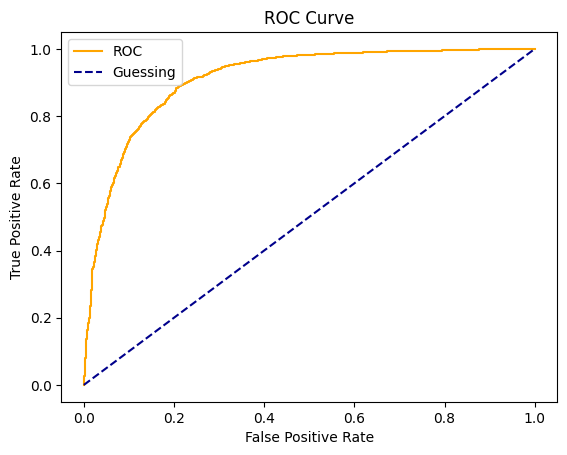

In [124]:
# draw ROC curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

# Plot roc auc curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_prob)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()  


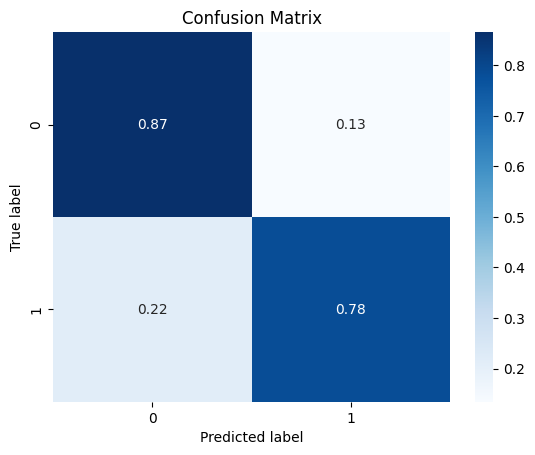

In [125]:
# add confusion matrix use y_test_pred_prob > 0.6
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Create confusion matrix
cm = confusion_matrix(y_test, y_test_pred_prob > 0.6)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [46]:
# Get feature importances from the trained XGBoost model
feature_importances = model.feature_importances_

# Create a DataFrame to display feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or display the feature importance results
print(feature_importance_df)


             Feature  Importance
6     vaep_offensive    0.431755
2   distance_to_goal    0.145503
3      angle_to_goal    0.140101
1   score_difference    0.084030
0            minutes    0.077353
4  foul_count_player    0.061908
5    foul_count_team    0.059351


In [47]:
features_with_label_df['score_difference'].value_counts()

 0     11307
-1      5547
-2      1997
-3       559
-4       150
-5        46
-6        27
 1        19
 2         4
-7         4
-8         3
-10        1
Name: score_difference, dtype: int64